In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Riyadh locations solar atlas data

In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
with open('SA.json') as f:
    data = json.load(f)

In [5]:
# Use pd.json_normalize to convert the JSON to a DataFrame
df = pd.json_normalize(data)

### **features**
- photovoltaic `PVOUT` power output specic unit: kWh/kWp
- Direct normal irradiation `DNI` unit: kWh/m2
- Global horizontal irradiation `GHI` unit: kWh/m2
- Diffuse horizontal irradiation `DIF` unit: kWh/m2
- Global tilted irradiation at optimum angle `GTI` opta unit:kWh/m2
- Optimum tilt of PV modules `OPTA` unit: °
- Air temperature TEMP unit: °C
- Terrain elevation ELE

In [6]:
df.head(2)

,long,lat,DIF,DNI,ELE,GHI,GTI_opta,OPTA,PVOUT_csi,TEMP
0,16.90874,45.34907,847.929688,2243.960938,1079,2410.453125,2556.453125,22,1945.507324,26.4375
1,17.15,43.17083,921.742188,1602.921875,789,2110.445312,2210.398438,20,1721.559814,26.6250


The latitude and longitude is in a reverse order correcting it in the cell below

In [7]:
df.columns

Index(['long', 'lat', 'DIF', 'DNI', 'ELE', 'GHI', 'GTI_opta', 'OPTA',
       'PVOUT_csi', 'TEMP'],
      dtype='object')

In [8]:
df.columns = ['lat', 'long', 'DIF', 'DNI', 'ELE', 'GHI', 'GTI_opta', 'OPTA','PVOUT_csi', 'TEMP']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27689 entries, 0 to 27688
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        27689 non-null  object 
 1   long       27689 non-null  object 
 2   DIF        27689 non-null  float64
 3   DNI        27689 non-null  float64
 4   ELE        27689 non-null  int64  
 5   GHI        27689 non-null  float64
 6   GTI_opta   27689 non-null  float64
 7   OPTA       27689 non-null  int64  
 8   PVOUT_csi  27689 non-null  float64
 9   TEMP       27689 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 2.1+ MB


In [10]:
df.to_csv("SA.csv",index=False)

In [11]:
sa_data = df.copy()

# EDA

In [12]:
# Display basic information about the dataset
sa_data.info()
sa_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27689 entries, 0 to 27688
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        27689 non-null  object 
 1   long       27689 non-null  object 
 2   DIF        27689 non-null  float64
 3   DNI        27689 non-null  float64
 4   ELE        27689 non-null  int64  
 5   GHI        27689 non-null  float64
 6   GTI_opta   27689 non-null  float64
 7   OPTA       27689 non-null  int64  
 8   PVOUT_csi  27689 non-null  float64
 9   TEMP       27689 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 2.1+ MB


,DIF,DNI,ELE,GHI,GTI_opta,OPTA,PVOUT_csi,TEMP
count,27689.000000,27689.000000,27689.000000,27689.000000,27689.000000,27689.000000,27689.000000,27689.000000
mean,804.007500,2123.939037,646.410705,2237.129849,2434.731054,26.346744,1866.239237,25.959864
std,89.283045,254.589998,473.206615,82.175930,97.688529,3.457192,77.395116,2.698305
min,444.906250,885.953125,-453.000000,1057.054688,1236.656250,16.000000,1039.702515,4.687500
25%,749.062500,1956.000000,284.000000,2184.187500,2382.210938,24.000000,1824.895752,24.500000
50%,818.078125,2111.171875,627.000000,2237.179688,2445.421875,27.000000,1869.734009,26.375000
75%,870.460938,2286.242188,877.000000,2292.921875,2500.570312,29.000000,1917.802612,27.625000
max,1014.968750,3057.968750,2963.000000,2443.500000,2705.609375,38.000000,2152.817383,31.375000


## Distribution

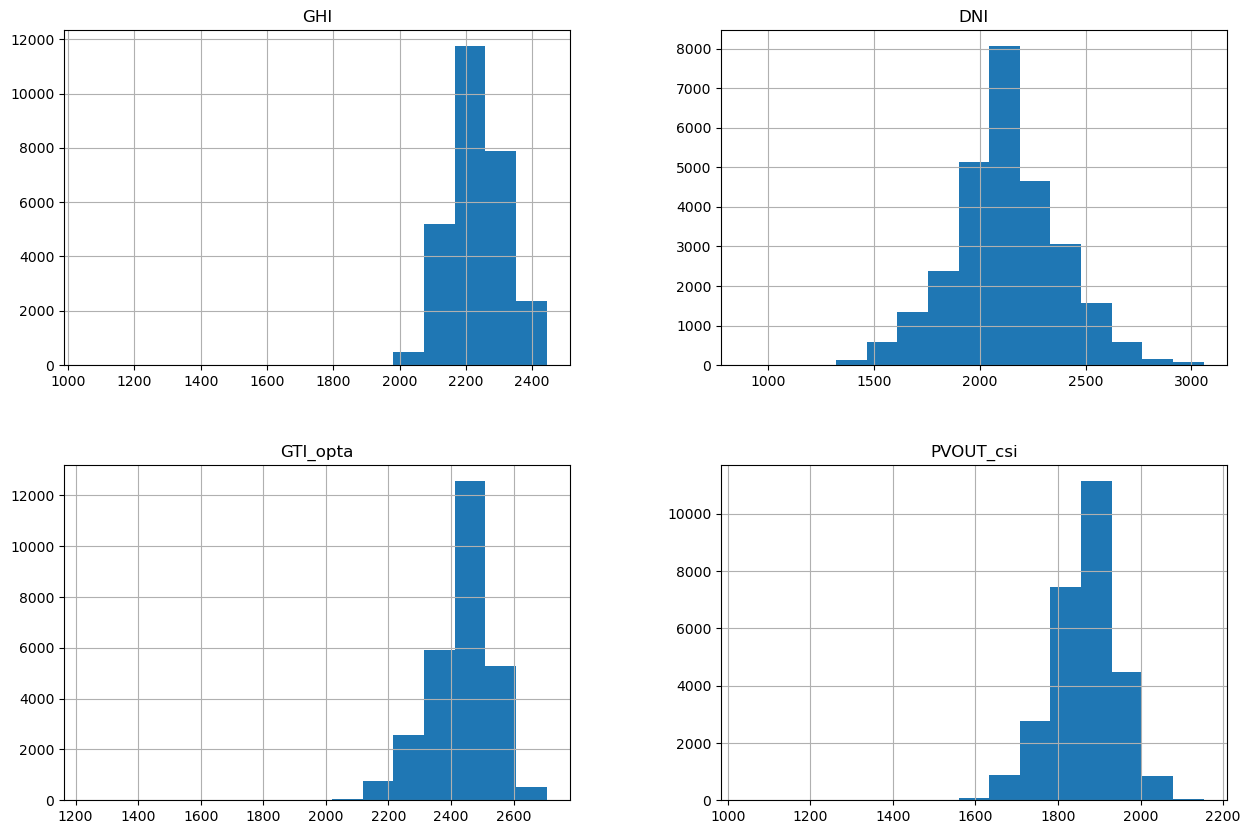

In [13]:
# Histograms for key variables
sa_data[['GHI', 'DNI', 'GTI_opta', 'PVOUT_csi']].hist(bins=15, figsize=(15, 10))
plt.show()


## Binary relationships

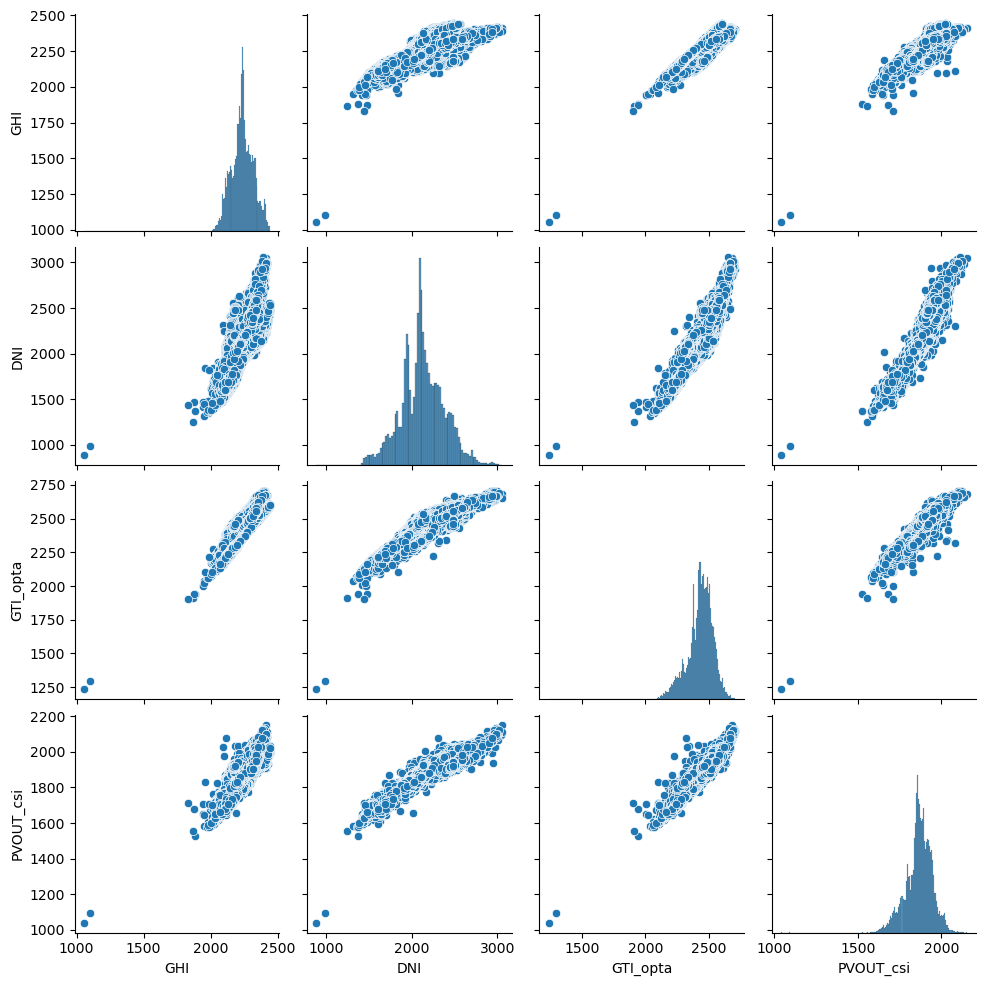

In [14]:
# Scatter plots to explore relationships
sns.pairplot(sa_data[['GHI', 'DNI', 'GTI_opta', 'PVOUT_csi']])
plt.show()


# Identifying Best location

## Individual parameter approach

In [15]:
# Identifying the best locations based on key solar parameters
# We can take the average or maximum of these parameters as criteria
best_locations = sa_data.groupby(['lat', 'long']).agg({
    'GHI': 'mean',
    'DNI': 'mean',
    'GTI_opta': 'mean',
    'PVOUT_csi': 'mean'
}).reset_index()

# Sort by one or more of these parameters to find the best locations
# For example, sorting by 'GHI' and 'PVOUT_csi'
best_locations = best_locations.sort_values(by=['GHI', 'PVOUT_csi'], ascending=False)

# Display the top locations
print(best_locations.head())


           lat      long          GHI          DNI     GTI_opta    PVOUT_csi
2010  18.47955  43.91206  2443.500000  2487.695312  2603.234375  2022.406616
1895  18.30291  43.78137  2442.289062  2520.437500  2604.351562  2023.615601
1815  18.22999  43.75073  2441.093750  2527.859375  2602.390625  2021.838623
1967  18.39533  43.74105  2440.500000  2468.218750  2603.632812  1995.015625
1453  17.92416  43.71675  2440.312500  2559.742188  2603.320312  2033.395508


## Rule Based Approach

In [16]:
df = pd.read_csv("SA.csv")

In [17]:
df.head(2)

,lat,long,DIF,DNI,ELE,GHI,GTI_opta,OPTA,PVOUT_csi,TEMP
0,16.90874,45.34907,847.929688,2243.960938,1079,2410.453125,2556.453125,22,1945.507324,26.4375
1,17.15000,43.17083,921.742188,1602.921875,789,2110.445312,2210.398438,20,1721.559814,26.6250


In [18]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


### Define weights for each criterion


In [19]:

weights = {
    'PVOUT': 0.3,
    'DNI': 0.2,
    'GHI': 0.1,
    'DIF': 0.1,
    'GTI opta': 0.1,
    'OPTA': 0.1,
    'TEMP': 0.05,
    'ELE': 0.05
}


### Normalize data


In [20]:

scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(df.drop(['lat', 'long'], axis=1)), columns=df.columns[2:])


### Calculate scores


In [21]:

df['Score'] = normalized_data.mul(weights).sum(axis=1)

# Rank locations
ranked_locations = df.sort_values(by='Score', ascending=False)

# Display the ranked locations
print(ranked_locations[['lat', 'long', 'Score']])


            lat      long     Score
8691   28.03333  36.13333  0.420930
10082  28.08333  36.03333  0.420929
9990   28.25000  36.03333  0.419784
5324   28.16667  36.11667  0.418897
9597   27.78333  36.15000  0.418006
...         ...       ...       ...
7106   19.23333  42.05000  0.241151
7271   20.61667  40.63333  0.240963
4140   17.45593  42.94104  0.235788
22571  50.27682  19.29725  0.150119
21105  48.55528  24.07972  0.143339

[27689 rows x 3 columns]


### Plot the map

In [22]:
ranked_locations  = ranked_locations.iloc[:-2]

In [23]:
ranked_locations

,lat,long,DIF,DNI,ELE,GHI,GTI_opta,OPTA,PVOUT_csi,TEMP,Score
8691,28.03333,36.13333,521.882812,2949.867188,1093,2399.523438,2701.828125,31,2100.198486,20.5625,0.420930
10082,28.08333,36.03333,518.437500,2958.484375,1159,2399.726562,2696.523438,31,2107.496826,19.9375,0.420929
9990,28.25000,36.03333,518.867188,2957.195312,1206,2399.265625,2703.835938,31,2120.161865,19.0000,0.419784
5324,28.16667,36.11667,528.156250,2929.914062,1112,2393.921875,2691.101562,31,2095.556885,19.9375,0.418897
9597,27.78333,36.15000,511.117188,2971.570312,1184,2405.257812,2692.015625,30,2092.662842,20.4375,0.418006
...,...,...,...,...,...,...,...,...,...,...,...
5727,17.54846,42.92907,815.226562,1464.703125,2157,1941.226562,2002.351562,17,1707.581055,17.3750,0.248544
1450,20.10000,41.25000,831.921875,1368.156250,1027,1883.242188,1941.828125,19,1524.179565,25.2500,0.245706
7106,19.23333,42.05000,723.703125,1474.093750,2307,1873.367188,1944.367188,19,1680.362061,18.1250,0.241151
7271,20.61667,40.63333,727.531250,1438.484375,1572,1832.328125,1902.671875,20,1710.063354,24.3125,0.240963


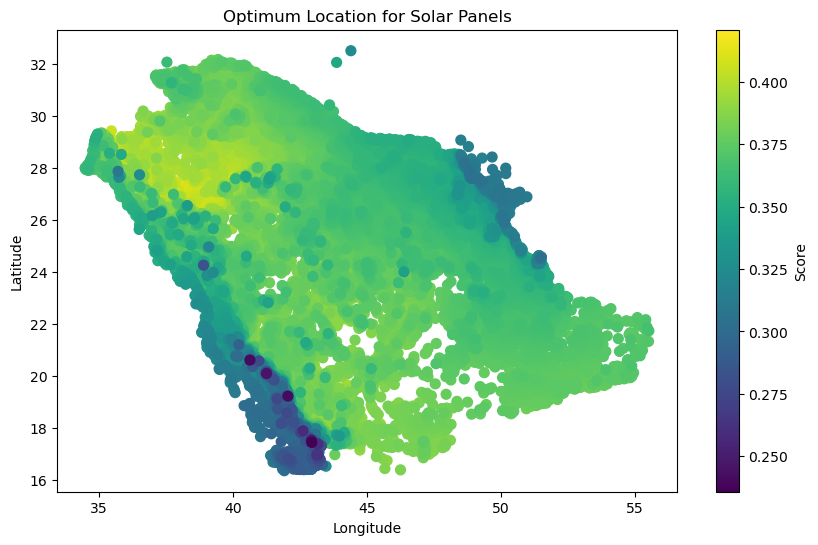

In [24]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(ranked_locations['long'], ranked_locations['lat'], c=ranked_locations['Score'], cmap='viridis', s=50)
plt.colorbar(label='Score')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Optimum Location for Solar Panels')
plt.show()

# Recommender Systems

In [25]:
%%capture
!pip install geopy

In [35]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from geopy.distance import geodesic


#normalize
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[['PVOUT_csi', 'DNI', 'GHI', 'DIF', 'GTI_opta', 'OPTA', 'TEMP', 'ELE']] = scaler.fit_transform(df[['PVOUT_csi', 'DNI', 'GHI', 'DIF', 'GTI_opta', 'OPTA', 'TEMP', 'ELE']])


similarity_matrix = cosine_similarity(df_normalized[['PVOUT_csi', 'DNI', 'GHI', 'DIF', 'GTI_opta', 'OPTA', 'TEMP']])
similarity_df = pd.DataFrame(similarity_matrix, index=df.index, columns=df.index)

def find_nearest_location(input_lat, input_long):
    """
    Finds the nearest location in the DataFrame to the given latitude and longitude.

    Parameters:
    - input_lat (float): Latitude of the input location.
    - input_long (float): Longitude of the input location.

    Returns:
    - nearest_location (tuple): Tuple containing the nearest latitude and longitude.
    """
    distances = [geodesic((input_lat, input_long), (lat, lon)).kilometers for lat, lon in zip(df['lat'], df['lon'])]
    nearest_location_index = np.argmin(distances)
    nearest_location = (df.loc[nearest_location_index, 'lat'], df.loc[nearest_location_index, 'lon'])
    return nearest_location

def recommend_locations(input_lat, input_long, num_recommendations=5, max_distance_km=10):
    """
    Recommends locations based on similarity, excluding those within a specified distance.

    Parameters:
    - input_lat (float): Latitude of the input location.
    - input_long (float): Longitude of the input location.
    - num_recommendations (int): Number of locations to recommend. Default is 5.
    - max_distance_km (float): Maximum distance in kilometers for recommended locations. Default is 10.

    Returns:
    - recommendations (DataFrame): DataFrame containing recommended locations and their attributes.
    """

    # Check for DataFrame existence and other validations (similar to the previous suggestions)

    # Check if the input location is in the DataFrame; if not, find the nearest location
    if (input_lat, input_long) not in zip(df['lat'], df['lon']):
        print("Given location not found in DataFrame. Finding nearest location...")
        input_lat, input_long = find_nearest_location(input_lat, input_long)
        print(f"Nearest location found: {input_lat}, {input_long}")

    # Find the index of the input location in the DataFrame
    input_location = df[(df['lat'] == input_lat) & (df['lon'] == input_long)].index[0]

    # Calculate distances and filter out locations within the specified threshold
    distances = [(loc, geodesic((df.loc[input_location, 'lat'], df.loc[input_location, 'lon']),
                                (df.loc[loc, 'lat'], df.loc[loc, 'lon'])).kilometers)
                 for loc in similarity_df.index[1:]]  # Skip the input location

    filtered_locations = [loc for loc, distance in distances if distance > max_distance_km]

    # If there are no recommendations after filtering, return an appropriate message
    if not filtered_locations:
        print(f"No recommendations found beyond {max_distance_km} km.")
        return

    # Get the top recommended locations based on similarity after filtering
    recommended_locations = sorted(filtered_locations, key=lambda loc: similarity_df.loc[input_location, loc],
                                   reverse=True)[:num_recommendations]

    # Retrieve the information for the recommended locations
    recommendations = df.loc[recommended_locations, ['lat', 'lon', 'PVOUT_csi', 'DNI', 'GHI', 'DIF', 'GTI_opta', 'OPTA', 'TEMP']]

    return recommendations

In [39]:
df.columns = ['lat', 'lon', 'DIF', 'DNI', 'GHI', 'GTI_opta', 'OPTA',
       'PVOUT_csi', 'TEMP']

In [38]:
df = df [['lat', 'lon' ,'PVOUT_csi','GHI','DNI',  'GTI_opta', 'OPTA','TEMP','DIF']]

In [29]:
df.to_csv('SA_final.csv',index=False)

In [41]:
df.head()

,lat,lon,DIF,DNI,GHI,GTI_opta,OPTA,PVOUT_csi,TEMP
0,16.90874,45.34907,22,2243.960938,1945.507324,1079,2556.453125,26.4375,0.383806
1,17.15000,43.17083,20,1602.921875,1721.559814,789,2210.398438,26.6250,0.303104
2,17.40555,44.00693,21,2331.226562,1940.720215,1376,2561.632812,25.0000,0.377266
3,17.10456,42.80334,19,1486.117188,1652.457520,83,2162.351562,30.9375,0.296386
4,17.33147,43.25468,21,1713.585938,1717.354980,881,2246.742188,26.0625,0.313742


In [42]:
input_latitude = 27.78333	 # Replace with actual lat
input_longitude = 36.15000	 # Replace with actual long

recommendations = recommend_locations(input_latitude, input_longitude, num_recommendations=5, max_distance_km=300)
recommendations

,lat,lon,PVOUT_csi,DNI,GHI,DIF,GTI_opta,OPTA,TEMP
11780,31.10007,38.27116,19.9375,2543.515625,1932.964600,29,965,2473.750000,0.371867
3433,27.19438,39.15512,20.9375,2623.851562,2000.524292,29,1229,2596.281250,0.400708
9773,27.15903,39.13805,20.8125,2599.953125,2023.923096,29,1211,2605.601562,0.398721
27526,26.52006,38.87875,22.2500,2702.054688,2027.087524,29,1199,2635.468750,0.408113
4407,31.22395,38.53194,19.2500,2555.945312,1962.350342,30,1104,2484.007812,0.378111
